# Visualisasi Data
1. review basic Pandas dengan dataset Canada.xlsx dari https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true
2. Membuat graph visual dari data tersebut:
    - line
    - area
    - bar
    - pie (beberapa titik data)
    - histogram (distribusi frekuensi)
    - boxplot (statistik set data)
    - scatter (dua set data dibandingkan)

In [1]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



## review basic Pandas

In [6]:
# import data
df = pd.read_excel("dataset/Canada.xlsx", 
                   sheet_name="Canada by Citizenship",
                   skiprows=20,
                   skipfooter=2)

print(df.shape)
display(df.head())
display(df.tail())

(195, 43)


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [9]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [8]:
# hapus kolom yang tidak mau dipakai
hapus_kolom = ['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName']
df.drop(columns=hapus_kolom, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OdName    195 non-null    object
 1   AreaName  195 non-null    object
 2   RegName   195 non-null    object
 3   1980      195 non-null    int64 
 4   1981      195 non-null    int64 
 5   1982      195 non-null    int64 
 6   1983      195 non-null    int64 
 7   1984      195 non-null    int64 
 8   1985      195 non-null    int64 
 9   1986      195 non-null    int64 
 10  1987      195 non-null    int64 
 11  1988      195 non-null    int64 
 12  1989      195 non-null    int64 
 13  1990      195 non-null    int64 
 14  1991      195 non-null    int64 
 15  1992      195 non-null    int64 
 16  1993      195 non-null    int64 
 17  1994      195 non-null    int64 
 18  1995      195 non-null    int64 
 19  1996      195 non-null    int64 
 20  1997      195 non-null    int64 
 21  1998      195 no

In [10]:
# ganti nama kolom jadi lebih masuk akal, lebih mudah diingat
df.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

df.head(2)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [11]:
# untuk mempermudah kita nantinya mau ambil kolom-kolom tahun saja, kita buat variable years
years = range(1980, 2014)

# contoh
df[years].head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603


In [13]:
# cek missing values
df.isnull().sum().sum()

# karena tidak ada missing values, kita tidak perlu dropna atau fillna kali ini

0

In [14]:
# tidak ada tipe data yang perlu kita ubah, semua kolom punya tipe data yang sesuai, kita lanjut ke pengecekan berikut

In [16]:
# cek apakah kolom Country unik semua, tidak ada negara yang tertulis dobel
print(df.shape)
df['Country'].nunique()

(195, 37)


195

In [17]:
# setelah memastikan kolom Country value nya unik semua, 195 value unik untuk 195 baris data,
# kita bisa gunakan kolom tersebut sebagai index
# sehingga index kita lebih berguna daripada hanya angka urut
df.set_index("Country", inplace=True)

df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


In [19]:
# contoh kegunaan index menjadi nama negara, bukan angka urut
# misal kita mau ambil data negara tertentu, anggap Indonesia

# df_indo = df[df["Country"] == "Indonesia"] # caranya kalau kolom Country bukan index

df_indo = df.loc["Indonesia"] # perhatikan pengambilan data seperti ini jadinya Series 1D
df_indo

Continent                  Asia
Region       South-Eastern Asia
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008                        661
2009    

In [22]:
# kalau mau hasil pengambilan data 2D DataFrame, kita tambahkan array di dalam
df_indo = df.loc[["Indonesia"]]
df_indo

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387


In [23]:
# keuntungan mengambil data dalam bentuk 2D, kita bisa ambil beberapa baris sekaligus
# misalnya, selain Indonesia, kita mau ambil data Japan juga
df_injp = df.loc[["Indonesia", "Japan"]]
df_injp

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387
Japan,Asia,Eastern Asia,701,756,598,309,246,198,248,422,...,973,1067,1212,1250,1284,1194,1168,1265,1214,982


In [24]:
# gunakan describe untuk melihat angka-angka statistic dataset kita
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [26]:
# kita juga bisa cari data dari kolom lain, misalnya khusus negara2 Region South East Asia
# sebelumnya cek dulu kolom Region value nya apa saja
df['Region'].value_counts()

Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
Northern Europe              10
South-Eastern Asia           10
Eastern Europe               10
Southern Asia                 9
Middle Africa                 9
Western Europe                9
Central America               8
Eastern Asia                  7
Northern Africa               7
Southern Africa               5
Central Asia                  5
Polynesia                     4
Melanesia                     4
Micronesia                    4
Australia and New Zealand     2
Northern America              2
Name: Region, dtype: int64

In [27]:
# kita ambil khusus negara di region South-Eastern Asia
df[df["Region"] == "South-Eastern Asia"]

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,79,6,8,2,2,4,12,16,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,12,19,26,33,10,7,8,14,...,348,370,529,460,354,203,200,196,233,288
Indonesia,Asia,South-Eastern Asia,186,178,252,115,123,100,127,213,...,552,632,613,657,661,504,712,390,395,387
Lao People's Democratic Republic,Asia,South-Eastern Asia,11,6,16,16,7,17,21,20,...,38,42,74,53,32,39,54,22,25,15
Malaysia,Asia,South-Eastern Asia,786,816,813,448,384,374,425,817,...,401,593,580,600,658,640,802,409,358,204
Myanmar,Asia,South-Eastern Asia,80,62,46,31,41,23,18,33,...,191,210,953,1887,975,1153,556,368,193,262
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Singapore,Asia,South-Eastern Asia,241,301,337,169,128,139,205,372,...,311,392,298,690,734,366,805,219,146,141
Thailand,Asia,South-Eastern Asia,56,53,113,65,82,66,78,117,...,392,575,500,487,519,512,499,396,296,400


# Line
bisa digunakan untuk melihat trend satu set data, misalkan progress berat badan seseorang dari hari ke hari. Atau di contoh kali ini, jumlah imigran yang dikirim sebuah negara dari tahun ke tahun

In [29]:
# Contoh: Kita ambil data Imigrasi Singapore dari tahun 1980-2013 lalu kita buat jadi Line Plot
df_sg = df.loc[["Singapore"], years]
df_sg

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141


<AxesSubplot:xlabel='Country'>

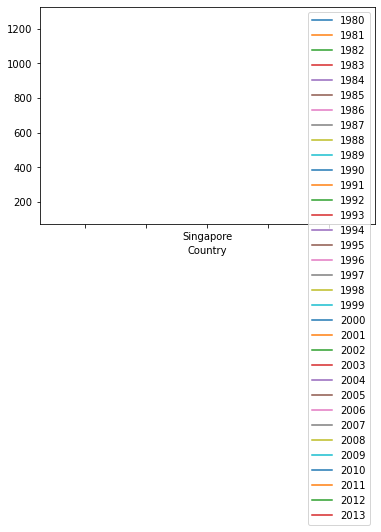

In [30]:
df_sg.plot()

saat membuat plot, pandas akan membuat x-axis dari index DataFrame, dan line plot ambil 1 set data (1 kolom data) untuk jadi 1 garis di plot nya. DataFrame kita df_sg punya index "Singapore" dan 33 kolom 1980-2013, jadinya x-axis punya 1 value "Singapore" sementara ada 33 garis, masing2 untuk setiap tahun, setiap kolom.

In [31]:
# tukar index dan kolom dengan Transpose
df_sg = df_sg.T
df_sg

Country,Singapore
1980,241
1981,301
1982,337
1983,169
1984,128
1985,139
1986,205
1987,372
1988,808
1989,1269


<AxesSubplot:>

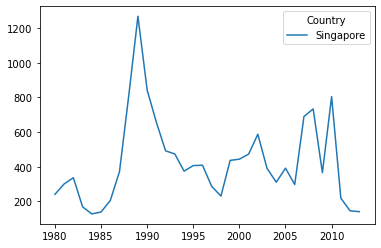

In [32]:
df_sg.plot()

Text(0, 0.5, 'Total Immigrants')

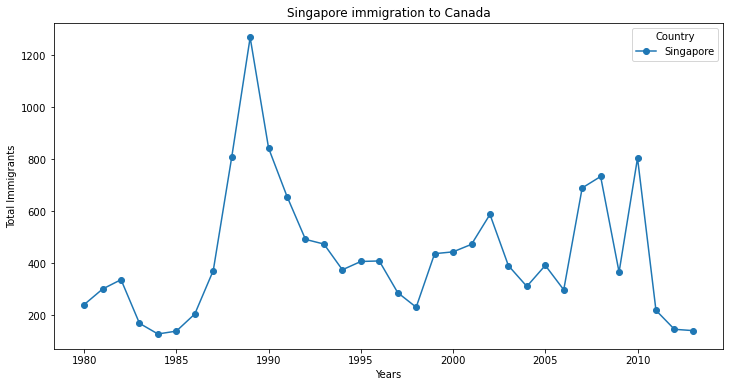

In [36]:
# kita akan mempercantik plot nya
# tambahkan opsi untuk membuat plot nya punya marker per tahun https://matplotlib.org/stable/api/markers_api.html
# ubah ukuran plot dengan figsize
df_sg.plot(marker="o", figsize=(12,6))

# tambahkan label ke plot nya
plt.title("Singapore immigration to Canada")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

In [37]:
# ubah style matplotlib supaya ada kotak kotak di background
mpl.style.use(["bmh"])

Text(1990, 1200, 'puncak imigrasi')

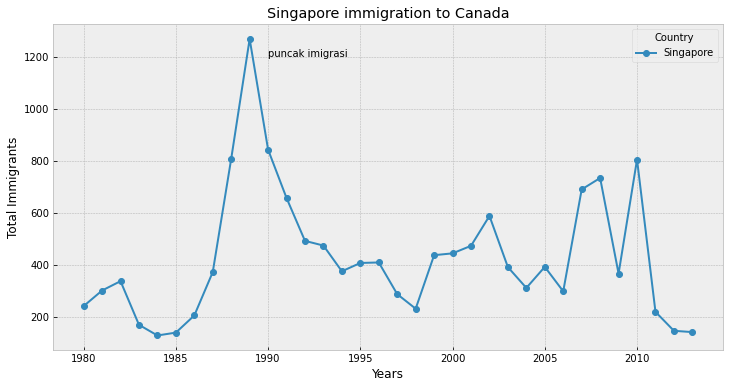

In [39]:
df_sg.plot(marker="o", figsize=(12,6))

plt.title("Singapore immigration to Canada")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

# tambahkan text di plot nya plt.text(x, y, label)
plt.text(1990, 1200, "puncak imigrasi")

Setelah membuat sebuah plot, tambahkan konklusi, analisis hasil plot - akan digunakan nanti saat membuat assignment 1.

Contoh analisis: Ada lonjakan naik jumlah imigran Singapore di tahun 1988-1990, kemungkinan ada terjadi sesuatu di negara tersebut di tahun 1987 atau 1988. Biasanya jumlah imigran Singapore yang ke Canada ada di antara 100-400 orang, tapi setelah tahun 1991 rata-rata lumayan naik menjadi 200-600 orang.

## Line Plot dengan 2+ set data
Kita akan coba membuat Line Plot dengan lebih dari satu set data. Misalkan kita mau bandingkan trend Imigrasi antara tiga negara: Singapore, Malaysia, Indonesia

In [41]:
df_smi = df.loc[["Singapore", "Malaysia", "Indonesia"], years].T
df_smi

Country,Singapore,Malaysia,Indonesia
1980,241,786,186
1981,301,816,178
1982,337,813,252
1983,169,448,115
1984,128,384,123
1985,139,374,100
1986,205,425,127
1987,372,817,213
1988,808,2072,270
1989,1269,2346,260


<AxesSubplot:>

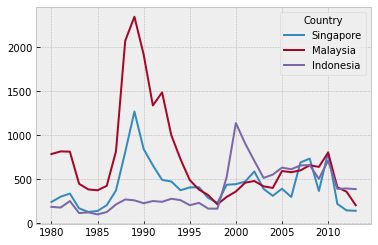

In [42]:
df_smi.plot()

Text(0, 0.5, 'Total Immigrants')

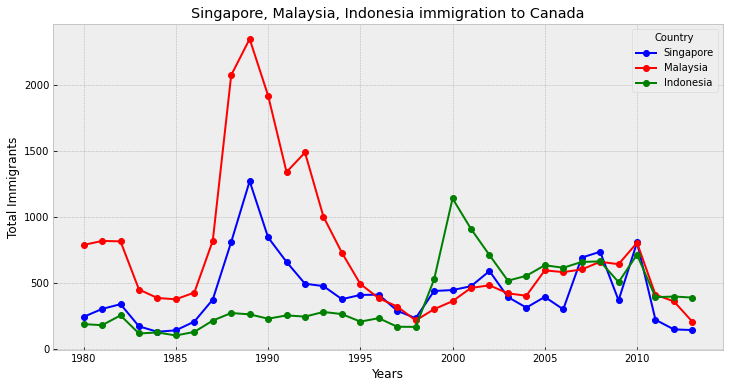

In [46]:
# menggunakan opsi supaya plot nya lebih cantik
# opsi apa saja yang ada di matplotlib punya line plot https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html
# opsi color ada warna apa saja https://matplotlib.org/stable/gallery/color/named_colors.html
df_smi.plot(figsize=(12,6),
           marker="o",
           color=["blue", "red", "green"]) 
# *note jangan buat line plot dengan lebih dari 7 set data, warna jadi semakin sulit kita bedakan

plt.title("Singapore, Malaysia, Indonesia immigration to Canada")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

Dari plot ini terlihat kalau trend yang jumlah imigran tiba tiba bertambah banyak di tahun 1988 terjadi di Singapore dan Malaysia, tapi tidak di Indonesia. Sementara di Indonesia ada trend yang jumlah imigran tiba tiba bertambah di tahun 1999-2000, tapi tidak terlihat trend yang sama di dua negara lainnya.

# Area Plot
mirip line plot, dengan tambahan opsi untuk "stacking". Nama lain Area Plot adalah Stacked Line Plot. 

Text(0, 0.5, 'Total Immigrants')

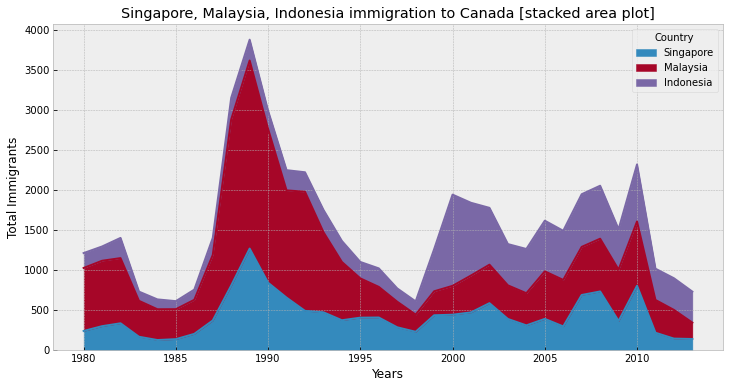

In [50]:
# Misal kita menggunakan data yang sama, tapi kali ini buat Area Plot
df_smi.plot(kind="area", figsize=(12,6))

plt.title("Singapore, Malaysia, Indonesia immigration to Canada [stacked area plot]")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

Text(0, 0.5, 'Total Immigrants')

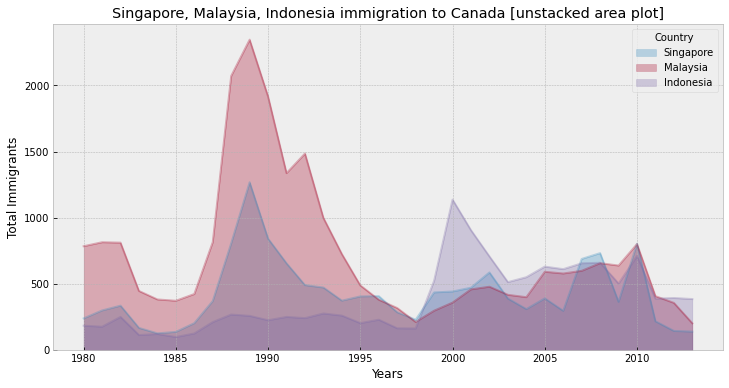

In [56]:
# tidak di stack juga bisa
# untuk area plot, kita punya opsi alpha, menentukan seberapa transparan warna per set data
df_smi.plot(kind="area", 
            figsize=(12,6), 
            stacked=False,
            alpha=0.3
           )

plt.title("Singapore, Malaysia, Indonesia immigration to Canada [unstacked area plot]")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

# Bar Chart
bar chart seperti line plot bisa membantu kita melihat trend dari sebuah set data, tambahannya, karena dia akan menggambar setiap bar dengan value dari 0 - value, kita bisa lebih pasti dalam melihat seberapa besar perubahan yang terjadi.

misalkan jumlah imigran dari Indonesia berubah dari 200, jadi 202, 198, perubahan tidak banyak. tapi line chart bisa secara tidak sengaja menunjukkan visual seolah olah perubahannya besar. bar chart tidak akan mempunyai efek itu, karena semua datanya terlihat dari 0.

Text(0, 0.5, 'Total Immigrants')

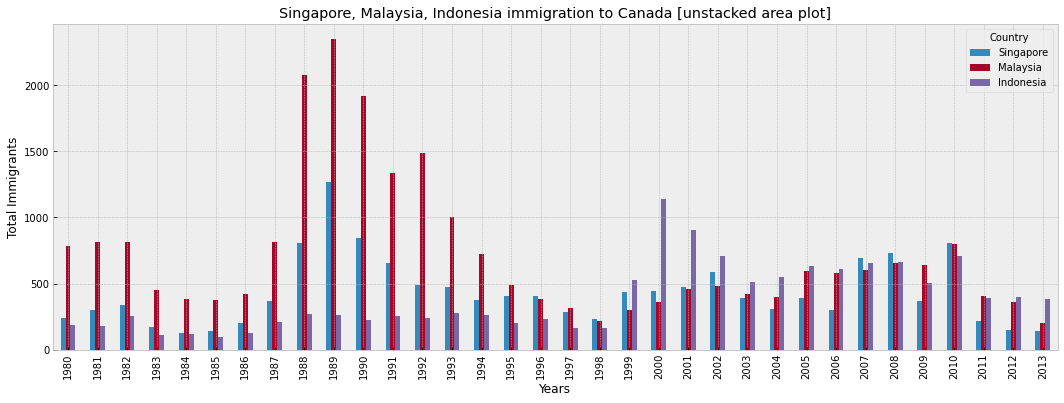

In [58]:
# kita buat bar chart dari data yang sama tadi
df_smi.plot(kind="bar", 
            figsize=(18,6),
           )

plt.title("Singapore, Malaysia, Indonesia immigration to Canada [unstacked area plot]")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")

Text(0.5, 0, 'Total Immigrants')

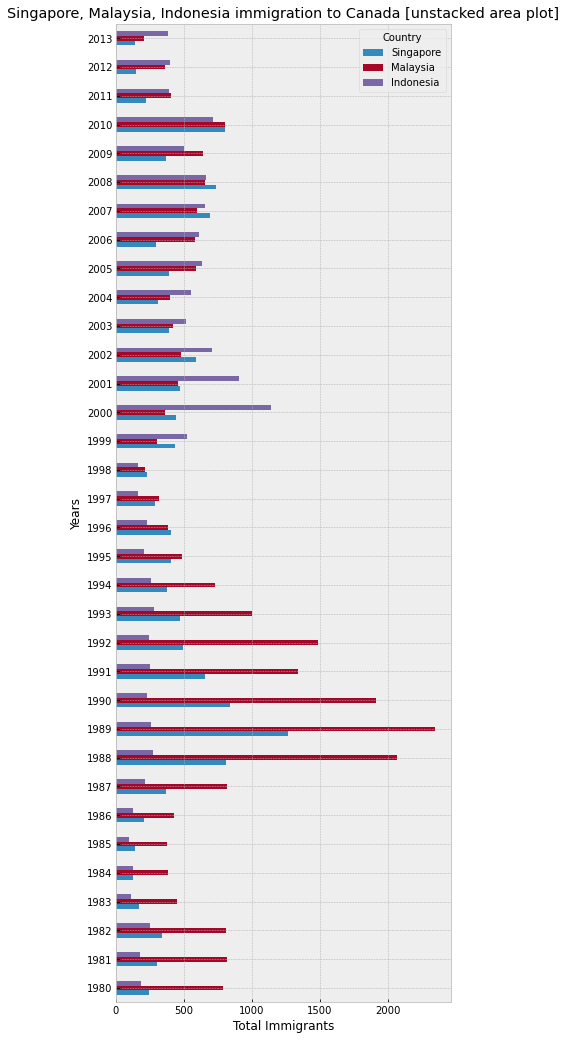

In [61]:
# bisa juga dibuat bar vertical
# kita buat bar chart dari data yang sama tadi
df_smi.plot(kind="barh", 
            figsize=(6,18),
           )

plt.title("Singapore, Malaysia, Indonesia immigration to Canada [unstacked area plot]")
plt.ylabel("Years")
plt.xlabel("Total Immigrants")

### Belajar annotate plot

Text(0, 0.5, 'Total Immigrants')

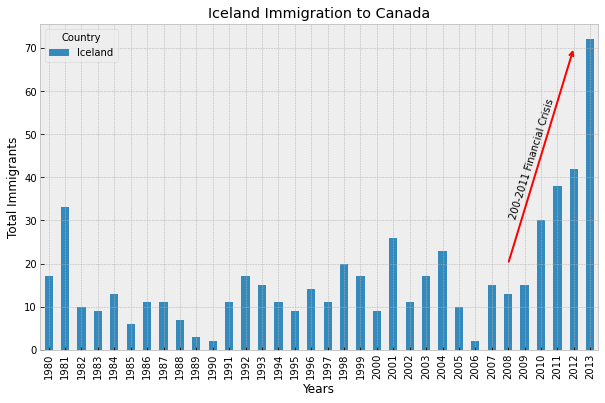

In [73]:
# kita akan buat plot data imigrasi Iceland ke Canada dan menambahkan anotasi
df_ice = df.loc[["Iceland"], years].T
df_ice.plot(kind="bar", figsize=(10,6))

# tambahkan panah
plt.annotate("", # text kosong karena ini panah
             xy=(32,70), # lokasi kepala panah
             xytext=(28,20), # lokasi buntut panah
             xycoords='data', # membuat lokasi berdasarkan titik data, bukan value data
             arrowprops= dict(   
                 arrowstyle="->", # style arrow nya
                 connectionstyle="arc3", # konek buntut dan kepala panah pakai garis seperti apa
                 color="red", # warna panah
                 lw=2 # tebal panahnya
             ) # arrowprops membuat anotasi jadi tipe panah
            )

# tambahin text yang bisa berotasi
plt.annotate("200-2011 Financial Crisis",
             xy=(28,30), # lokasi text dimulai
             rotation=72.5, # seberapa miring text nya
             va='bottom', # vertical alignment
             ha='left', # horizontal alignment
            )

plt.title("Iceland Immigration to Canada")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")